In [2]:
# Import the necessary libraries:

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Define the transforms to be applied to the dataset
train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))])


In [4]:
# Download and preprocess the CIFAR-100 training set:
trainset = torchvision.datasets.CIFAR100(root='./data', train=True,download=True, transform=train_transform)

# Split the training set into train and validation sets:
trainset, valset = torch.utils.data.random_split(trainset, [45000, 5000])

# Download and preprocess the CIFAR-100 test set:
testset = torchvision.datasets.CIFAR100(root='./data', train=False,download=True, transform=test_transform)

# Define the size of the validation set
validation_size = 5000

# Define the batch size:
batch_size = 32

# Create the data loaders for the train, validation, and test sets:

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=2)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size,shuffle=False, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


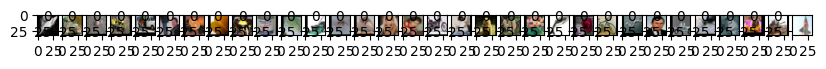

In [5]:
# Display some preprocessed training images
images, labels = next(iter(trainloader))

fig, axes = plt.subplots(1, len(images), figsize=(10,5))
for i, image in enumerate(images):
    # Unnormalize the image
    image = image * torch.Tensor([0.2675, 0.2565, 0.2761]).reshape(3, 1, 1) + torch.Tensor([0.5071, 0.4867, 0.4408]).reshape(3, 1, 1)
    np_image = image.numpy()
    # Transpose the dimensions from C x H x W to H x W x C
    np_image = np.transpose(np_image, (1, 2, 0))
    axes[i].imshow(np_image)


In [6]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 100)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

simple_net = SimpleNet()


In [7]:
import torch
import torch.nn as nn
import torchvision.models as models

# Load pre-trained VGG19 model for CIFAR-100
vgg19 = models.vgg19(pretrained=True)

# Modify the last layer for CIFAR-100
num_classes = 100
vgg19.classifier[-1] = nn.Linear(in_features=4096, out_features=num_classes, bias=True)

c:\Users\Z003Z4PY\Anaconda3\envs\proj\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Z003Z4PY\Anaconda3\envs\proj\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [17]:
# Define the number of epochs to train the model for
num_epochs = 100

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer for SimpleNet using the SGD algorithm
simple_net_sgd_optimizer = torch.optim.SGD(simple_net.parameters(), lr=0.001)

# Define the optimizer for SimpleNet using the Adam algorithm
simple_net_adam_optimizer = torch.optim.Adam(simple_net.parameters(), lr=0.001)

# Train the model for the specified number of epochs using the SGD optimizer
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        simple_net_sgd_optimizer.zero_grad()
        outputs = simple_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        simple_net_sgd_optimizer.step()
        running_loss += loss.item()
        
    # Evaluate the model on the validation set after each epoch
    correct = 0
    total = 0
    with torch.no_grad():
        for data in valloader:
            images, labels = data
            outputs = simple_net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print('Epoch [%d], Loss: %.4f, Validation Accuracy: %.2f%%' %
          (epoch + 1, running_loss / len(trainloader), accuracy))


Epoch [1], Loss: 3.6089, Validation Accuracy: 15.02%
Epoch [2], Loss: 3.5931, Validation Accuracy: 15.64%
Epoch [3], Loss: 3.5852, Validation Accuracy: 15.50%
Epoch [4], Loss: 3.5702, Validation Accuracy: 15.64%
Epoch [5], Loss: 3.5504, Validation Accuracy: 16.08%
Epoch [6], Loss: 3.5418, Validation Accuracy: 16.46%
Epoch [7], Loss: 3.5273, Validation Accuracy: 16.22%
Epoch [8], Loss: 3.5181, Validation Accuracy: 16.92%
Epoch [9], Loss: 3.5042, Validation Accuracy: 17.10%
Epoch [10], Loss: 3.4888, Validation Accuracy: 17.34%
Epoch [11], Loss: 3.4765, Validation Accuracy: 17.38%
Epoch [12], Loss: 3.4637, Validation Accuracy: 17.52%
Epoch [13], Loss: 3.4576, Validation Accuracy: 17.72%
Epoch [14], Loss: 3.4445, Validation Accuracy: 17.24%
Epoch [15], Loss: 3.4324, Validation Accuracy: 18.02%
Epoch [16], Loss: 3.4151, Validation Accuracy: 18.28%
Epoch [17], Loss: 3.4060, Validation Accuracy: 18.68%
Epoch [18], Loss: 3.3927, Validation Accuracy: 18.60%
Epoch [19], Loss: 3.3843, Validation 

In [18]:
# Define the number of epochs to train the model for
num_epochs = 100

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer for SimpleNet using the SGD algorithm
simple_net_sgd_optimizer = torch.optim.SGD(simple_net.parameters(), lr=0.0001)

# Define the optimizer for SimpleNet using the Adam algorithm
simple_net_adam_optimizer = torch.optim.Adam(simple_net.parameters(), lr=0.0001)

# Train the model for the specified number of epochs using the SGD optimizer
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        simple_net_sgd_optimizer.zero_grad()
        outputs = simple_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        simple_net_sgd_optimizer.step()
        running_loss += loss.item()
        
    # Evaluate the model on the validation set after each epoch
    correct = 0
    total = 0
    with torch.no_grad():
        for data in valloader:
            images, labels = data
            outputs = simple_net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print('Epoch [%d], Loss: %.4f, Validation Accuracy: %.2f%%' %
          (epoch + 1, running_loss / len(trainloader), accuracy))


Epoch [1], Loss: 2.8403, Validation Accuracy: 29.16%
Epoch [2], Loss: 2.8343, Validation Accuracy: 28.60%
Epoch [3], Loss: 2.8331, Validation Accuracy: 28.34%
Epoch [4], Loss: 2.8292, Validation Accuracy: 28.42%
Epoch [5], Loss: 2.8247, Validation Accuracy: 28.88%
Epoch [6], Loss: 2.8245, Validation Accuracy: 28.06%
Epoch [7], Loss: 2.8261, Validation Accuracy: 28.40%
Epoch [8], Loss: 2.8286, Validation Accuracy: 29.26%
Epoch [9], Loss: 2.8266, Validation Accuracy: 29.38%
Epoch [10], Loss: 2.8231, Validation Accuracy: 29.20%
Epoch [11], Loss: 2.8282, Validation Accuracy: 28.32%
Epoch [12], Loss: 2.8222, Validation Accuracy: 28.26%
Epoch [13], Loss: 2.8182, Validation Accuracy: 28.88%
Epoch [14], Loss: 2.8220, Validation Accuracy: 28.88%
Epoch [15], Loss: 2.8201, Validation Accuracy: 28.80%
Epoch [16], Loss: 2.8201, Validation Accuracy: 28.38%
Epoch [17], Loss: 2.8271, Validation Accuracy: 29.40%
Epoch [18], Loss: 2.8199, Validation Accuracy: 29.16%
Epoch [19], Loss: 2.8193, Validation 

In [19]:
# Define the number of epochs to train the model for
num_epochs = 200

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer for SimpleNet using the SGD algorithm
simple_net_sgd_optimizer = torch.optim.SGD(simple_net.parameters(), lr=0.01)

# Define the optimizer for SimpleNet using the Adam algorithm
simple_net_adam_optimizer = torch.optim.Adam(simple_net.parameters(), lr=0.01)

# Train the model for the specified number of epochs using the SGD optimizer
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        simple_net_sgd_optimizer.zero_grad()
        outputs = simple_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        simple_net_sgd_optimizer.step()
        running_loss += loss.item()
        
    # Evaluate the model on the validation set after each epoch
    correct = 0
    total = 0
    with torch.no_grad():
        for data in valloader:
            images, labels = data
            outputs = simple_net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print('Epoch [%d], Loss: %.4f, Validation Accuracy: %.2f%%' %
          (epoch + 1, running_loss / len(trainloader), accuracy))


Epoch [1], Loss: 3.1541, Validation Accuracy: 20.24%
Epoch [2], Loss: 3.0527, Validation Accuracy: 23.84%
Epoch [3], Loss: 3.0133, Validation Accuracy: 25.02%
Epoch [4], Loss: 2.9718, Validation Accuracy: 24.42%
Epoch [5], Loss: 2.9437, Validation Accuracy: 25.66%
Epoch [6], Loss: 2.9142, Validation Accuracy: 23.48%
Epoch [7], Loss: 2.8939, Validation Accuracy: 25.24%
Epoch [8], Loss: 2.8745, Validation Accuracy: 25.42%
Epoch [9], Loss: 2.8543, Validation Accuracy: 24.26%
Epoch [10], Loss: 2.8364, Validation Accuracy: 26.24%
Epoch [11], Loss: 2.8195, Validation Accuracy: 25.72%
Epoch [12], Loss: 2.7998, Validation Accuracy: 24.54%
Epoch [13], Loss: 2.7859, Validation Accuracy: 27.86%
Epoch [14], Loss: 2.7688, Validation Accuracy: 25.60%
Epoch [15], Loss: 2.7713, Validation Accuracy: 26.26%
Epoch [16], Loss: 2.7486, Validation Accuracy: 29.02%
Epoch [17], Loss: 2.7440, Validation Accuracy: 28.78%
Epoch [18], Loss: 2.7309, Validation Accuracy: 28.08%
Epoch [19], Loss: 2.7215, Validation 

Epoch [1], Loss: 2.3027, Validation Accuracy: 32.32%
Epoch [2], Loss: 2.2923, Validation Accuracy: 33.94%
Epoch [3], Loss: 2.2956, Validation Accuracy: 35.08%
Epoch [4], Loss: 2.2922, Validation Accuracy: 32.38%
Epoch [5], Loss: 2.2948, Validation Accuracy: 32.92%
Epoch [6], Loss: 2.2896, Validation Accuracy: 35.46%
Epoch [7], Loss: 2.2955, Validation Accuracy: 33.16%
Epoch [8], Loss: 2.2931, Validation Accuracy: 31.98%
Epoch [9], Loss: 2.2986, Validation Accuracy: 34.90%
Epoch [10], Loss: 2.2827, Validation Accuracy: 32.20%
Epoch [11], Loss: 2.2888, Validation Accuracy: 32.00%
Epoch [12], Loss: 2.2865, Validation Accuracy: 32.80%
Epoch [13], Loss: 2.2935, Validation Accuracy: 32.78%
Epoch [14], Loss: 2.2860, Validation Accuracy: 34.42%
Epoch [15], Loss: 2.2885, Validation Accuracy: 34.70%
Epoch [16], Loss: 2.2905, Validation Accuracy: 32.38%
Epoch [17], Loss: 2.2886, Validation Accuracy: 32.82%
Epoch [18], Loss: 2.2888, Validation Accuracy: 34.98%
Epoch [19], Loss: 2.2839, Validation 

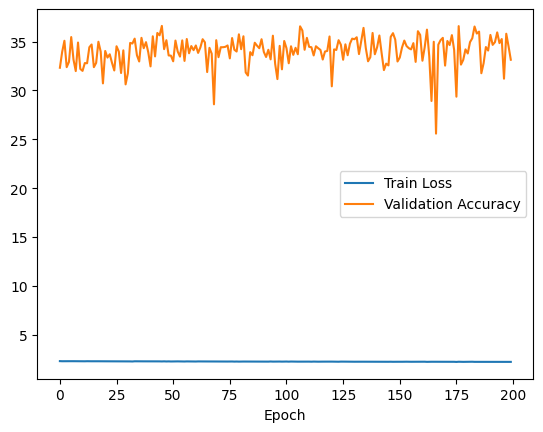

In [20]:
import matplotlib.pyplot as plt

# Define the number of epochs to train the model for
num_epochs = 200

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer for SimpleNet using the SGD algorithm
simple_net_sgd_optimizer = torch.optim.SGD(simple_net.parameters(), lr=0.01)

# Define the optimizer for SimpleNet using the Adam algorithm
simple_net_adam_optimizer = torch.optim.Adam(simple_net.parameters(), lr=0.01)

# Initialize lists to store the loss and accuracy values for each epoch
train_loss_values = []
val_accuracy_values = []

# Train the model for the specified number of epochs using the SGD optimizer
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        simple_net_sgd_optimizer.zero_grad()
        outputs = simple_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        simple_net_sgd_optimizer.step()
        running_loss += loss.item()
        
    # Evaluate the model on the validation set after each epoch
    correct = 0
    total = 0
    with torch.no_grad():
        for data in valloader:
            images, labels = data
            outputs = simple_net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    
    # Append the loss and accuracy values for the current epoch to their respective lists
    train_loss_values.append(running_loss / len(trainloader))
    val_accuracy_values.append(accuracy)
    
    print('Epoch [%d], Loss: %.4f, Validation Accuracy: %.2f%%' %
          (epoch + 1, train_loss_values[-1], val_accuracy_values[-1]))

# Plot the learning curve
plt.plot(range(num_epochs), train_loss_values, label='Train Loss')
plt.plot(range(num_epochs), val_accuracy_values, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Epoch [1], Loss: 2.2241, Validation Accuracy: 34.92%
Epoch [2], Loss: 2.2209, Validation Accuracy: 34.12%
Epoch [3], Loss: 2.2262, Validation Accuracy: 35.60%
Epoch [4], Loss: 2.2276, Validation Accuracy: 34.04%
Epoch [5], Loss: 2.2286, Validation Accuracy: 33.92%
Epoch [6], Loss: 2.2277, Validation Accuracy: 35.36%
Epoch [7], Loss: 2.2264, Validation Accuracy: 33.92%
Epoch [8], Loss: 2.2276, Validation Accuracy: 34.84%
Epoch [9], Loss: 2.2189, Validation Accuracy: 35.56%
Epoch [10], Loss: 2.2277, Validation Accuracy: 33.86%
Epoch [11], Loss: 2.2276, Validation Accuracy: 21.76%
Epoch [12], Loss: 2.2150, Validation Accuracy: 37.32%
Epoch [13], Loss: 2.2274, Validation Accuracy: 34.36%
Epoch [14], Loss: 2.2240, Validation Accuracy: 35.26%
Epoch [15], Loss: 2.2237, Validation Accuracy: 30.80%
Epoch [16], Loss: 2.2255, Validation Accuracy: 35.56%
Epoch [17], Loss: 2.2129, Validation Accuracy: 35.52%
Epoch [18], Loss: 2.2144, Validation Accuracy: 34.08%
Epoch [19], Loss: 2.2163, Validation 

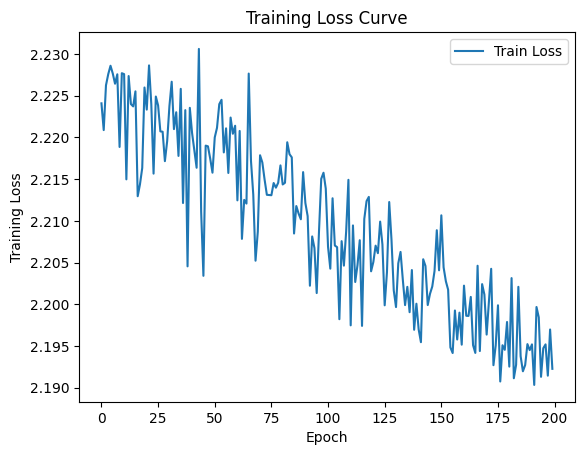

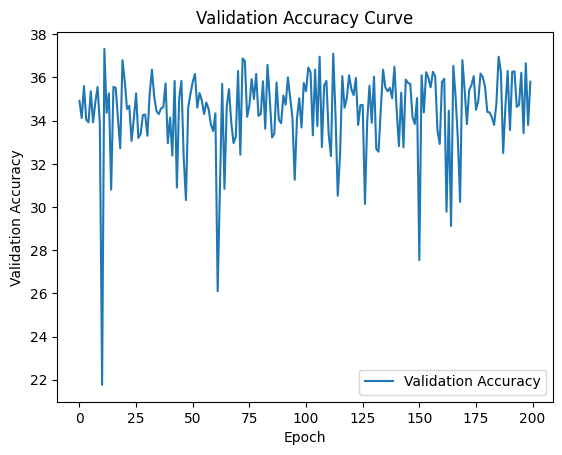

In [21]:
import matplotlib.pyplot as plt

# Define the number of epochs to train the model for
num_epochs = 200

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer for SimpleNet using the SGD algorithm
simple_net_sgd_optimizer = torch.optim.SGD(simple_net.parameters(), lr=0.01)

# Define the optimizer for SimpleNet using the Adam algorithm
simple_net_adam_optimizer = torch.optim.Adam(simple_net.parameters(), lr=0.01)

# Initialize lists to store the loss and accuracy values for each epoch
train_loss_values = []
val_accuracy_values = []

# Train the model for the specified number of epochs using the SGD optimizer
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        simple_net_sgd_optimizer.zero_grad()
        outputs = simple_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        simple_net_sgd_optimizer.step()
        running_loss += loss.item()
        
    # Evaluate the model on the validation set after each epoch
    correct = 0
    total = 0
    with torch.no_grad():
        for data in valloader:
            images, labels = data
            outputs = simple_net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    
    # Append the loss and accuracy values for the current epoch to their respective lists
    train_loss_values.append(running_loss / len(trainloader))
    val_accuracy_values.append(accuracy)
    
    print('Epoch [%d], Loss: %.4f, Validation Accuracy: %.2f%%' %
          (epoch + 1, train_loss_values[-1], val_accuracy_values[-1]))

# Plot the training loss curve
plt.plot(range(num_epochs), train_loss_values, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

# Plot the validation accuracy curve
plt.plot(range(num_epochs), val_accuracy_values, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Curve')
plt.legend()
plt.show()


Epoch [1], Loss: 4.2325, Validation Accuracy: 5.34%
Epoch [2], Loss: 4.1564, Validation Accuracy: 6.82%
Epoch [3], Loss: 4.1775, Validation Accuracy: 4.86%
Epoch [4], Loss: 4.1638, Validation Accuracy: 5.92%
Epoch [5], Loss: 4.2044, Validation Accuracy: 5.80%
Epoch [6], Loss: 4.4564, Validation Accuracy: 3.58%
Epoch [7], Loss: 4.5341, Validation Accuracy: 3.10%
Epoch [8], Loss: 4.4076, Validation Accuracy: 2.94%
Epoch [9], Loss: 4.3678, Validation Accuracy: 3.14%
Epoch [10], Loss: 4.4472, Validation Accuracy: 2.52%
Epoch [11], Loss: 4.3799, Validation Accuracy: 3.22%
Epoch [12], Loss: 4.3672, Validation Accuracy: 3.10%
Epoch [13], Loss: 4.4150, Validation Accuracy: 2.40%
Epoch [14], Loss: 4.4846, Validation Accuracy: 2.28%
Epoch [15], Loss: 4.4144, Validation Accuracy: 2.50%
Epoch [16], Loss: 4.4181, Validation Accuracy: 2.96%
Epoch [17], Loss: 4.5366, Validation Accuracy: 1.68%
Epoch [18], Loss: 4.5822, Validation Accuracy: 1.38%
Epoch [19], Loss: 4.5910, Validation Accuracy: 1.28%
Ep

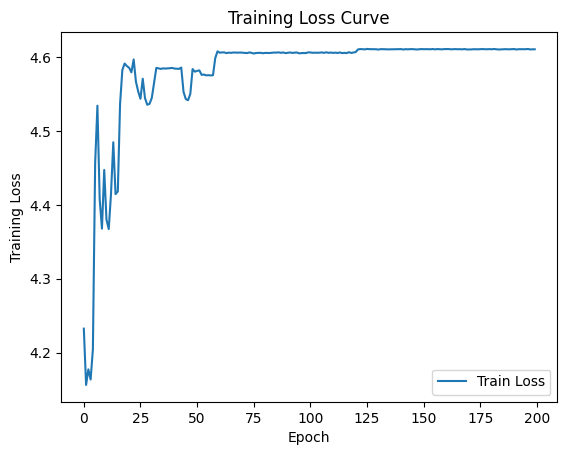

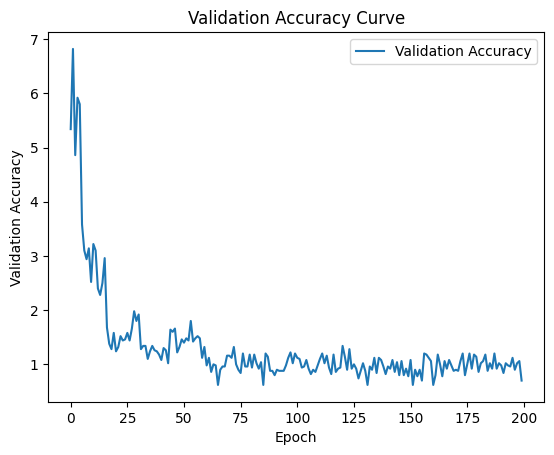

In [22]:
import matplotlib.pyplot as plt

# Define the number of epochs to train the model for
num_epochs = 200

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer for SimpleNet using the Adam algorithm
simple_net_adam_optimizer = torch.optim.Adam(simple_net.parameters(), lr=0.01)

# Initialize lists to store the loss and accuracy values for each epoch
train_loss_values = []
val_accuracy_values = []

# Train the model for the specified number of epochs using the SGD optimizer
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        simple_net_adam_optimizer.zero_grad()
        outputs = simple_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        simple_net_adam_optimizer.step()
        running_loss += loss.item()
        
    # Evaluate the model on the validation set after each epoch
    correct = 0
    total = 0
    with torch.no_grad():
        for data in valloader:
            images, labels = data
            outputs = simple_net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    
    # Append the loss and accuracy values for the current epoch to their respective lists
    train_loss_values.append(running_loss / len(trainloader))
    val_accuracy_values.append(accuracy)
    
    print('Epoch [%d], Loss: %.4f, Validation Accuracy: %.2f%%' %
          (epoch + 1, train_loss_values[-1], val_accuracy_values[-1]))

# Plot the training loss curve
plt.plot(range(num_epochs), train_loss_values, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

# Plot the validation accuracy curve
plt.plot(range(num_epochs), val_accuracy_values, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Curve')
plt.legend()
plt.show()


Epoch [1], Loss: 4.6493, Validation Accuracy: 1.08%
Epoch [2], Loss: 4.6492, Validation Accuracy: 1.10%
Epoch [3], Loss: 4.6489, Validation Accuracy: 0.88%
Epoch [4], Loss: 4.6488, Validation Accuracy: 0.84%
Epoch [5], Loss: 4.6504, Validation Accuracy: 0.82%
Epoch [6], Loss: 4.6490, Validation Accuracy: 0.84%
Epoch [7], Loss: 4.6496, Validation Accuracy: 1.02%
Epoch [8], Loss: 4.6514, Validation Accuracy: 0.96%
Epoch [9], Loss: 4.6497, Validation Accuracy: 0.92%
Epoch [10], Loss: 4.6489, Validation Accuracy: 0.92%
Epoch [11], Loss: 4.6503, Validation Accuracy: 0.90%
Epoch [12], Loss: 4.6481, Validation Accuracy: 1.30%
Epoch [13], Loss: 4.6505, Validation Accuracy: 1.10%
Epoch [14], Loss: 4.6509, Validation Accuracy: 1.00%
Epoch [15], Loss: 4.6480, Validation Accuracy: 1.12%
Epoch [16], Loss: 4.6502, Validation Accuracy: 1.12%
Epoch [17], Loss: 4.6492, Validation Accuracy: 0.90%
Epoch [18], Loss: 4.6499, Validation Accuracy: 1.20%
Epoch [19], Loss: 4.6498, Validation Accuracy: 0.62%
Ep

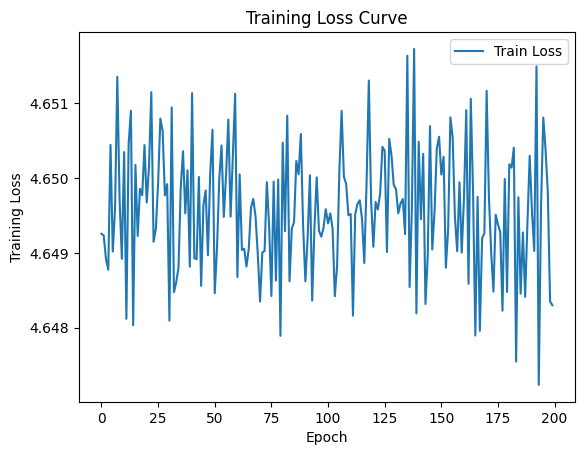

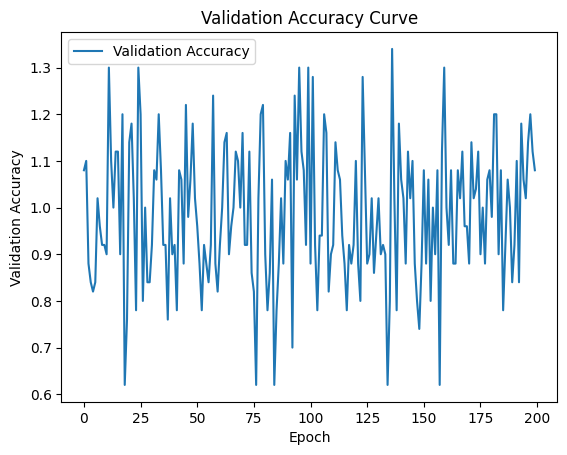

In [23]:
import matplotlib.pyplot as plt

# Define the number of epochs to train the model for
num_epochs = 200

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer for SimpleNet using the Adam algorithm
simple_net_adam_optimizer = torch.optim.Adam(simple_net.parameters(), lr=0.1)

# Initialize lists to store the loss and accuracy values for each epoch
train_loss_values = []
val_accuracy_values = []

# Train the model for the specified number of epochs using the SGD optimizer
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        simple_net_adam_optimizer.zero_grad()
        outputs = simple_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        simple_net_adam_optimizer.step()
        running_loss += loss.item()
        
    # Evaluate the model on the validation set after each epoch
    correct = 0
    total = 0
    with torch.no_grad():
        for data in valloader:
            images, labels = data
            outputs = simple_net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    
    # Append the loss and accuracy values for the current epoch to their respective lists
    train_loss_values.append(running_loss / len(trainloader))
    val_accuracy_values.append(accuracy)
    
    print('Epoch [%d], Loss: %.4f, Validation Accuracy: %.2f%%' %
          (epoch + 1, train_loss_values[-1], val_accuracy_values[-1]))

# Plot the training loss curve
plt.plot(range(num_epochs), train_loss_values, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

# Plot the validation accuracy curve
plt.plot(range(num_epochs), val_accuracy_values, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Curve')
plt.legend()
plt.show()


In [8]:
import torch
import torchvision.models as models

# Define the pre-trained VGG19 model
vgg19 = models.vgg19(pretrained=True)

Epoch [1], Loss: 3.6284, Validation Accuracy: 29.32%
Epoch [2], Loss: 2.2985, Validation Accuracy: 35.34%
Epoch [3], Loss: 1.9053, Validation Accuracy: 45.88%
Epoch [4], Loss: 1.6857, Validation Accuracy: 42.06%
Epoch [5], Loss: 1.5246, Validation Accuracy: 51.98%
Epoch [6], Loss: 1.3914, Validation Accuracy: 53.50%
Epoch [7], Loss: 1.2830, Validation Accuracy: 56.40%
Epoch [8], Loss: 1.2002, Validation Accuracy: 52.38%
Epoch [9], Loss: 1.1194, Validation Accuracy: 56.04%
Epoch [10], Loss: 1.0487, Validation Accuracy: 53.44%
Epoch [11], Loss: 0.9879, Validation Accuracy: 58.78%
Epoch [12], Loss: 0.9262, Validation Accuracy: 61.16%
Epoch [13], Loss: 0.8827, Validation Accuracy: 60.38%
Epoch [14], Loss: 0.8285, Validation Accuracy: 58.42%
Epoch [15], Loss: 0.7770, Validation Accuracy: 53.56%
Epoch [16], Loss: 0.7423, Validation Accuracy: 61.90%
Epoch [17], Loss: 0.6944, Validation Accuracy: 63.00%
Epoch [18], Loss: 0.6613, Validation Accuracy: 49.50%
Epoch [19], Loss: 0.6385, Validation 

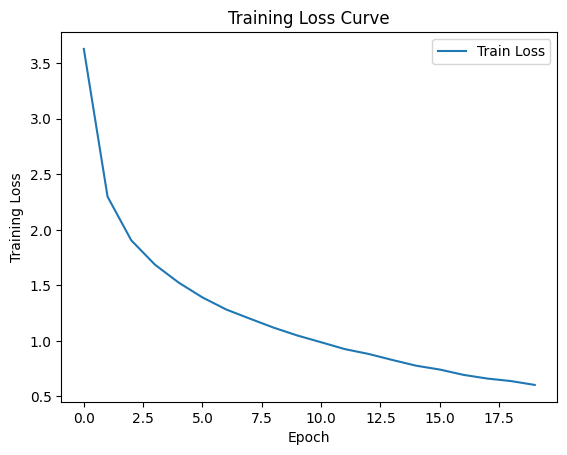

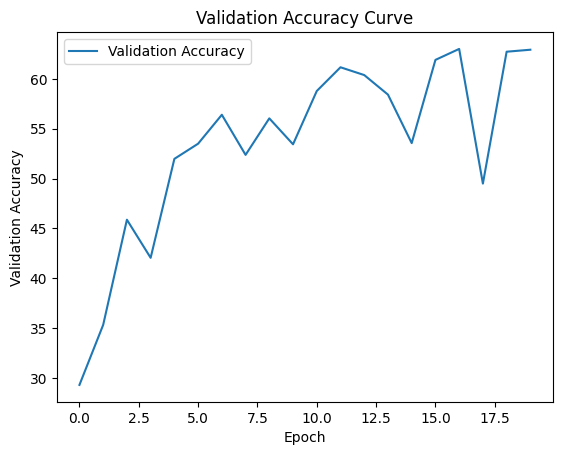

In [9]:
import matplotlib.pyplot as plt

# Define the number of epochs to train the model for
num_epochs = 20

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer for SimpleNet using the SGD algorithm
vgg19_sgd_optimizer = torch.optim.SGD(vgg19.parameters(), lr=0.01)

# Initialize lists to store the loss and accuracy values for each epoch
train_loss_values = []
val_accuracy_values = []

# Train the model for the specified number of epochs using the SGD optimizer
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        vgg19_sgd_optimizer.zero_grad()
        outputs = vgg19(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        vgg19_sgd_optimizer.step()
        running_loss += loss.item()
        
    # Evaluate the model on the validation set after each epoch
    correct = 0
    total = 0
    with torch.no_grad():
        for data in valloader:
            images, labels = data
            outputs = vgg19(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    
    # Append the loss and accuracy values for the current epoch to their respective lists
    train_loss_values.append(running_loss / len(trainloader))
    val_accuracy_values.append(accuracy)
    
    print('Epoch [%d], Loss: %.4f, Validation Accuracy: %.2f%%' %
          (epoch + 1, train_loss_values[-1], val_accuracy_values[-1]))

# Plot the training loss curve
plt.plot(range(num_epochs), train_loss_values, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

# Plot the validation accuracy curve
plt.plot(range(num_epochs), val_accuracy_values, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Curve')
plt.legend()
plt.show()


In [10]:
import matplotlib.pyplot as plt

# Define the number of epochs to train the model for
num_epochs = 20

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer for SimpleNet using the SGD algorithm
vgg19_adam_optimizer = torch.optim.Adam(vgg19.parameters(), lr=0.001)

# Initialize lists to store the loss and accuracy values for each epoch
train_loss_values = []
val_accuracy_values = []

# Train the model for the specified number of epochs using the SGD optimizer
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        vgg19_adam_optimizer.zero_grad()
        outputs = vgg19(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        vgg19_adam_optimizer.step()
        running_loss += loss.item()
        
    # Evaluate the model on the validation set after each epoch
    correct = 0
    total = 0
    with torch.no_grad():
        for data in valloader:
            images, labels = data
            outputs = vgg19(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    
    # Append the loss and accuracy values for the current epoch to their respective lists
    train_loss_values.append(running_loss / len(trainloader))
    val_accuracy_values.append(accuracy)
    
    print('Epoch [%d], Loss: %.4f, Validation Accuracy: %.2f%%' %
          (epoch + 1, train_loss_values[-1], val_accuracy_values[-1]))

# Plot the training loss curve
plt.plot(range(num_epochs), train_loss_values, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

# Plot the validation accuracy curve
plt.plot(range(num_epochs), val_accuracy_values, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Curve')
plt.legend()
plt.show()


Epoch [1], Loss: 4.5328, Validation Accuracy: 0.82%
Epoch [2], Loss: 4.6194, Validation Accuracy: 1.16%
Epoch [3], Loss: 4.6148, Validation Accuracy: 1.06%
Epoch [4], Loss: 4.6126, Validation Accuracy: 1.02%


In [ ]:
# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set the model to evaluation mode
vgg19.eval()

# Move the model to the device where you want to perform the inference
vgg19.to(device)

# Initialize variables to store total and correct predictions
total = 0
correct = 0

# Disable gradient computation to speed up inference
with torch.no_grad():

    # Iterate over the test dataloader
    for data in testloader:

        # Get inputs and labels from the dataloader
        inputs, labels = data

        # Move inputs and labels to device
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Make predictions
        outputs = vgg19(inputs)

        # Get the index of the class with the highest probability
        _, predicted = torch.max(outputs.data, 1)

        # Add the number of samples to the total count
        total += labels.size(0)

        # Add the number of correct predictions to the correct count
        correct += (predicted == labels).sum().item()

# Compute the accuracy
accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")
